# Datathon Submission : Zakaria and Shubhi

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

In [28]:
# importing the dataset 

df = pd.read_csv("38388-0001-Data.tsv", sep="\t")

In [29]:
#loading the first 5 rows, just to visualize what kind of data we have

df.head()

,ID,VARUNIT,WEIGHT,Q1,Q2,Q3,Q5,Q5A,Q96B,Q97,...,ANY_SCH_OTH,ANY_CHCR_PRE_Y,ANY_CHCR_PRE_NO,ANY_CHCR_PRE_DK,ANY_CHCR_PRE_NA,ANY_CHCR_PRE_NR,ANY_CHCR_NOW_Y,ANY_CHCR_NOW_NO,ANY_CHCR_NOW_NN,ANY_CHCR_NOW_DK
0,17567,20,3.1469,3,2,1,0,,,4,...,0,,,,,,,,,
1,13051,16,1.4563,1,,2,0,1,,1,...,0,,,,,,,,,
2,14472,4,0.7231,3,2,1,0,,,4,...,,,,,,,,,,
3,4115,9,0.9195,1,,0,3,,,,...,,,,,,,,,,
4,2976,28,0.3872,1,,1,6,,,2,...,0,,,,,,,,,


In [30]:
#determining how many of each type of data there is in the dataset

df.dtypes.value_counts()

object 203
int64 188
float64 1
dtype: int64

# There are 203 object types, 188 float types, and 1 float type

In [31]:
df.shape

(7737, 392)

# Visualizing the Relationship between the Health of Respondents and their Perception of the COVID Vaccine

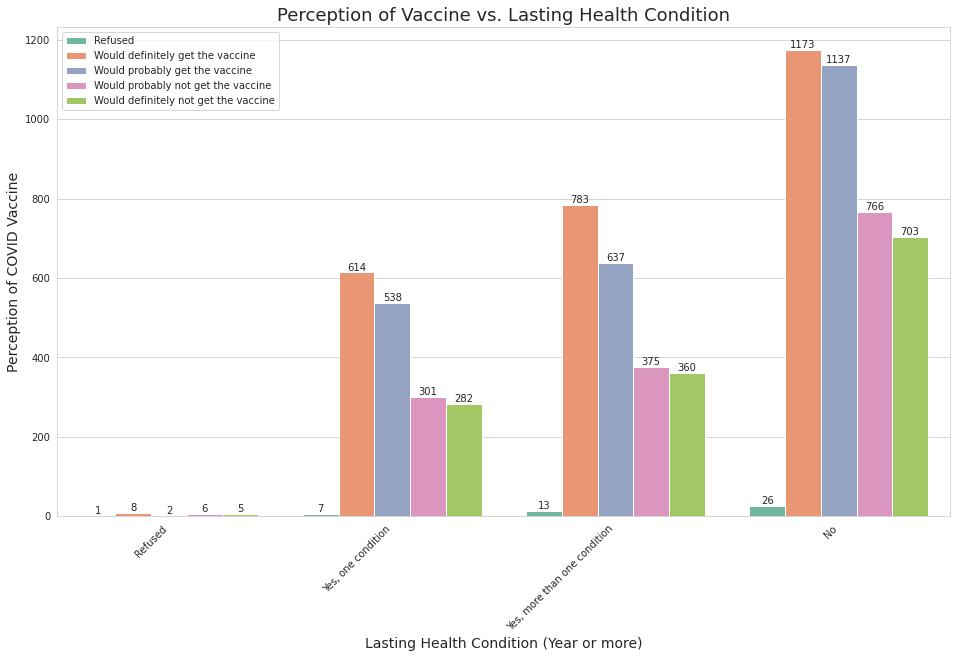

In [32]:
fig = plt.figure(figsize=(16, 9))

# Set the plot style
sns.set_style('whitegrid')
sns.set_palette("Set2")
# Create bar plot
ax = sns.countplot(x='Q29', hue='Q102', data=df)

original_labels = ['-1', '1', '2', '3']

q29_labels = ["Refused", "Yes, one condition", "Yes, more than one condition", "No"]

plt.xticks(range(len(original_labels)), q29_labels)

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height())}', 
            ha='center', va='bottom')

plt.title('Perception of Vaccine vs. Lasting Health Condition', fontsize=18)
plt.xlabel('Lasting Health Condition (Year or more)', fontsize=14)
plt.ylabel('Perception of COVID Vaccine', fontsize=14)

# Show the plot
plt.show()

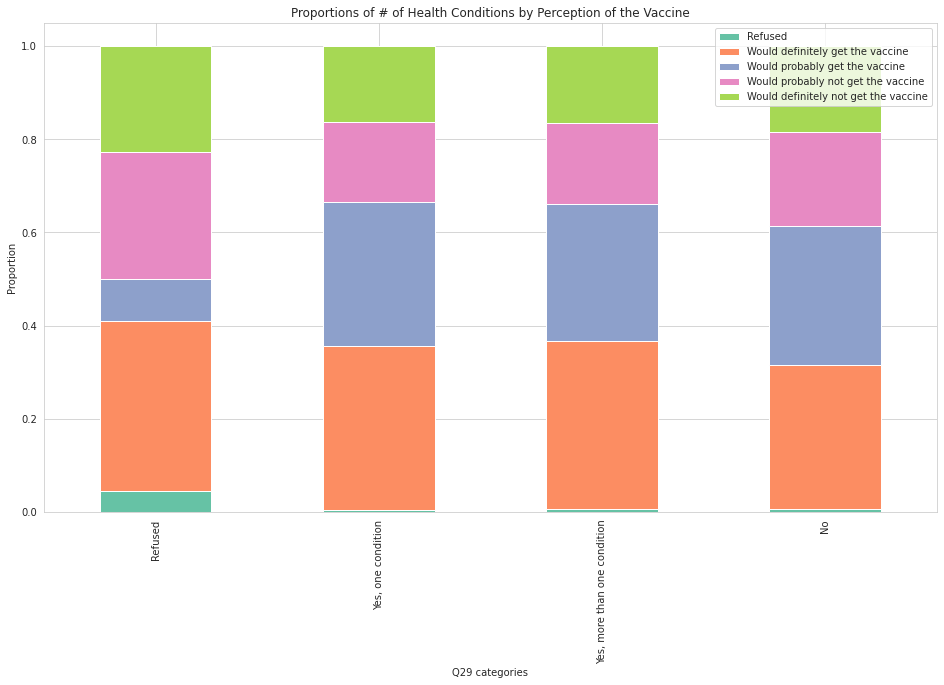

In [33]:
# Group data by Q29 and calculate proportion of each category within each group
grouped = df.groupby('Q29')['Q102'].value_counts(normalize=True).unstack()
sns.set_palette("Set2")
# Create stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(16, 9))

original_labels = ['-1', '1', '2', '3']

q29_labels = ["Refused", "Yes, one condition", "Yes, more than one condition", "No"]

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.xticks(range(len(original_labels)), q29_labels)
# Set the title and axis labels
ax.set_title('Proportions of # of Health Conditions by Perception of the Vaccine')
ax.set_xlabel('Q29 categories')
ax.set_ylabel('Proportion')

# Show the plot
plt.show()

# Modeling impact of work from COVID to perception of COVID Vaccine

Highest accuracy k: 41


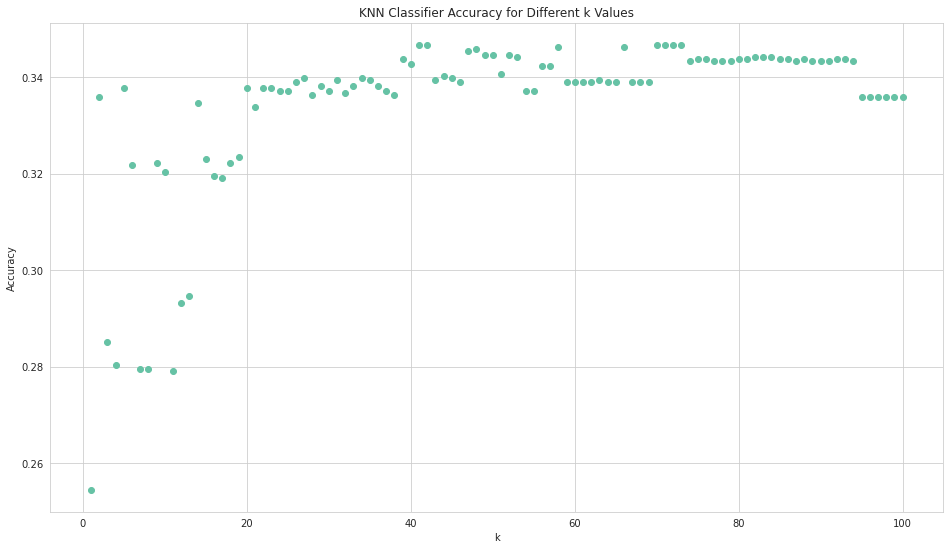

In [34]:
X = df[['Q99_1', 'Q99_2', 'Q99_3']]
Y = df['Q102']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 101)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

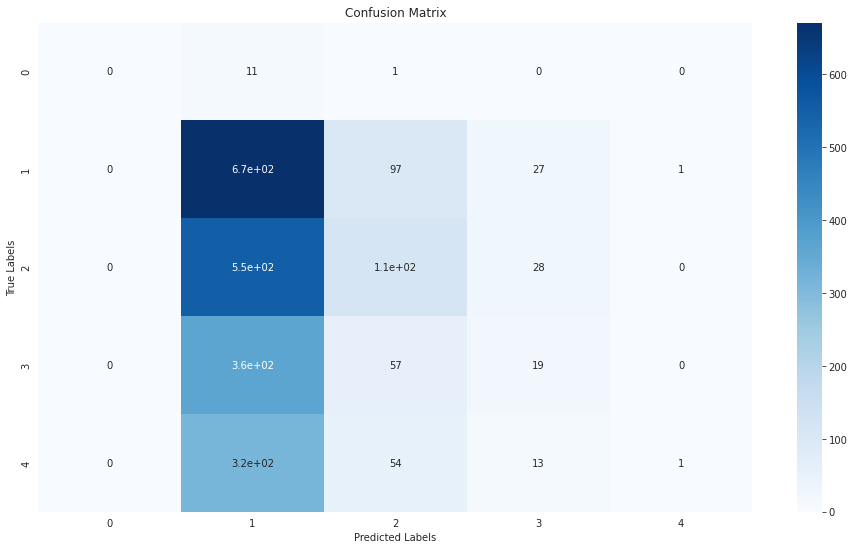

In [35]:
# classifier with k = 41
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train, Y_train)
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [36]:
for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.995
Recall for class 'Refused': 0.000
Accuracy for class 'Would definitely get the vaccine': 0.413
Recall for class 'Would definitely get the vaccine': 0.843
Accuracy for class 'Would probably get the vaccine': 0.661
Recall for class 'Would probably get the vaccine': 0.165
Accuracy for class 'Would probably not get the vaccine': 0.790
Recall for class 'Would probably not get the vaccine': 0.043
Accuracy for class 'Would definitely not get the vaccine': 0.835
Recall for class 'Would definitely not get the vaccine': 0.003


## While the accuracy increases for the categories as they skew negatively to the vaccine, the recall is much worse.

# Visualizing Household income vs Perception of Vaccine

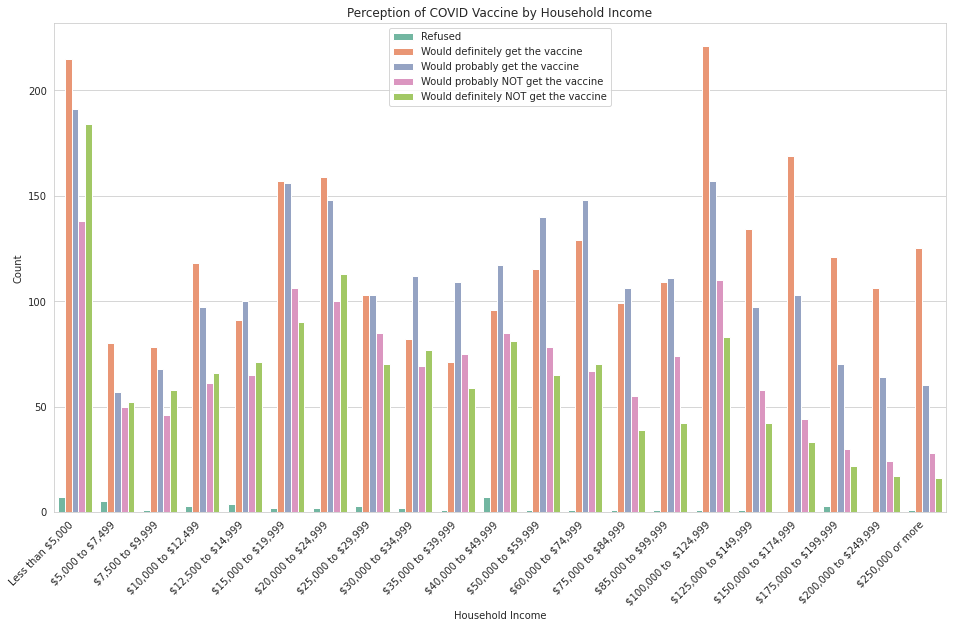

In [37]:
# household income vs perception of vaccine
fig = plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
ax = sns.countplot(x="PPINCIMP", hue="Q102", data=df, palette='Set2')


original_labels = range(1,22)

##pi_labels = ["0 to $12,499", "$12,500 to $29,999", "$30,000 to $59,999", "$60,000 to $124,999", "$125,000 to $249,999", "$250,000 or more"]

pe_labels = ["Refused", "Would definitely get the vaccine", "Would probably get the vaccine", "Would probably NOT get the vaccine", "Would definitely NOT get the vaccine"]
ax.legend(pe_labels)
pi_labels = ["Less than \$5,000", "\$5,000 to \$7,499", "\$7,500 to \$9,999", "\$10,000 to \$12,499", "\$12,500 to \$14,999", "\$15,000 to \$19,999", "\$20,000 to \$24,999", "\$25,000 to \$29,999", "\$30,000 to \$34,999", 
             "\$35,000 to \$39,999", "\$40,000 to \$49,999", "\$50,000 to \$59,999", "\$60,000 to \$74,999", "\$75,000 to \$84,999", "\$85,000 to \$99,999", "\$100,000 to  \$124,999", "\$125,000 to \$149,999", "\$150,000 to \$174,999", "\$175,000 to \$199,999", "\$200,000 to \$249,999", "\$250,000 or more"]
plt.xticks(range(0, len(original_labels)), pi_labels)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

# Customize the plot
plt.title("Perception of COVID Vaccine by Household Income")
plt.xlabel("Household Income")
plt.ylabel("Count")
plt.show()


# Proportions of Incomes based on their Perception of the Vaccine

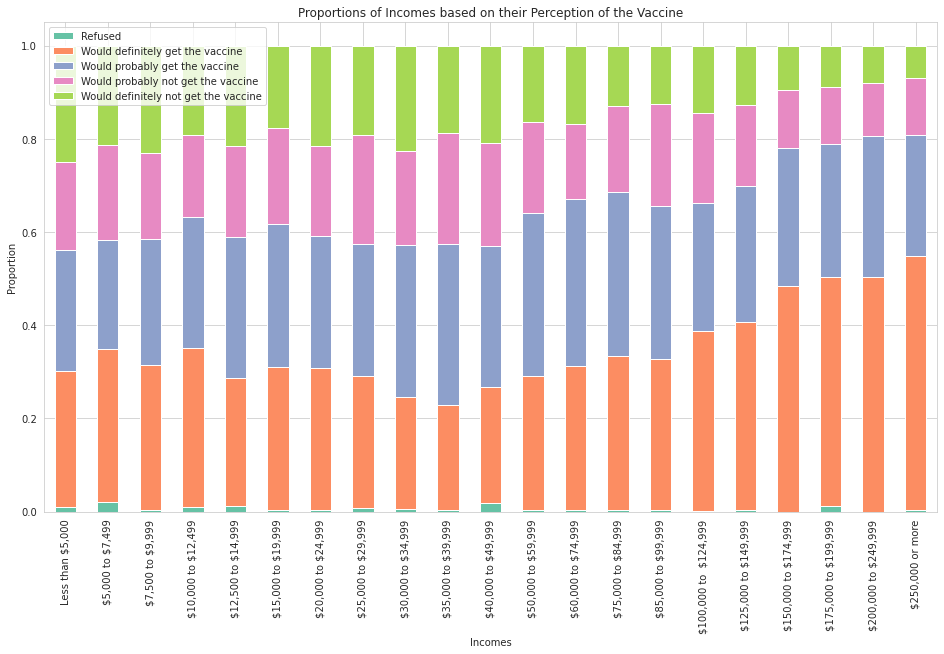

In [38]:
# Group data by Q29 and calculate proportion of each category within each group
grouped = df.groupby('PPINCIMP')['Q102'].value_counts(normalize=True).unstack()

sns.set_palette("Set2")
# Create stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(16, 9))

original_labels = range(1,22)

pi_labels = ["Less than \$5,000", "\$5,000 to \$7,499", "\$7,500 to \$9,999", "\$10,000 to \$12,499", "\$12,500 to \$14,999", "\$15,000 to \$19,999", "\$20,000 to \$24,999", "\$25,000 to \$29,999", "\$30,000 to \$34,999", 
             "\$35,000 to \$39,999", "\$40,000 to \$49,999", "\$50,000 to \$59,999", "\$60,000 to \$74,999", "\$75,000 to \$84,999", "\$85,000 to \$99,999", "\$100,000 to  \$124,999", "\$125,000 to \$149,999", "\$150,000 to \$174,999", "\$175,000 to \$199,999", "\$200,000 to \$249,999", "\$250,000 or more"]

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.xticks(range(len(original_labels)), pi_labels)
# Set the title and axis labels
ax.set_title('Proportions of Incomes based on their Perception of the Vaccine')
ax.set_xlabel('Incomes')
ax.set_ylabel('Proportion')

# Show the plot
plt.show()

## Based on this graph, it seems that about 1/3 of respondents who make less than \\$30,000 would definitely get the vaccine, but this number seems to drop as the income increases. Then, at about \\$40,000-\\$49,000, the proportion of respondents who would definitely get the vaccine seems to rise and continues to rise in proportion with the rising income. Therefore, it seems that those who have a higher income are more likely to perceive the vaccine in a positive light. 

# Modeling Education to Perception of COVID Vaccine

Highest accuracy k: 9


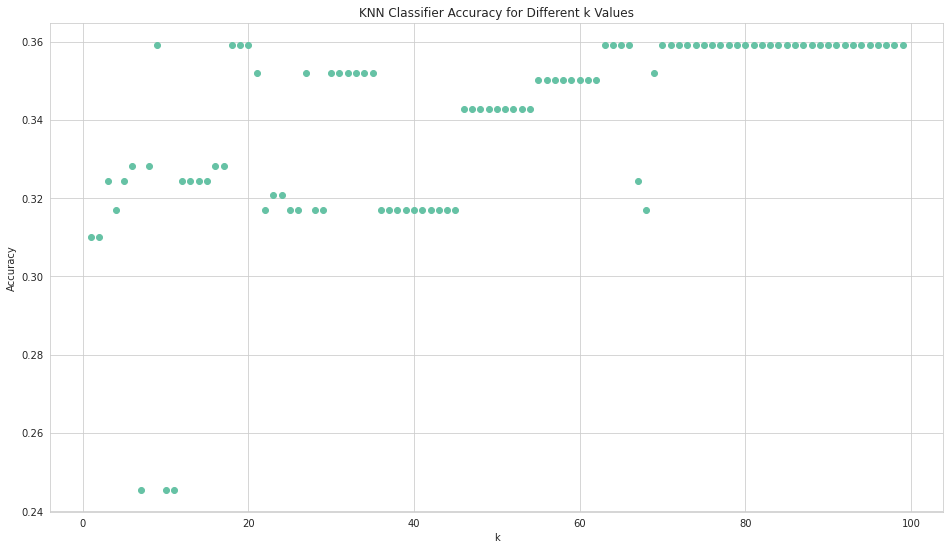

In [39]:
X = df[['PPEDUCAT']]
Y = df['Q102']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

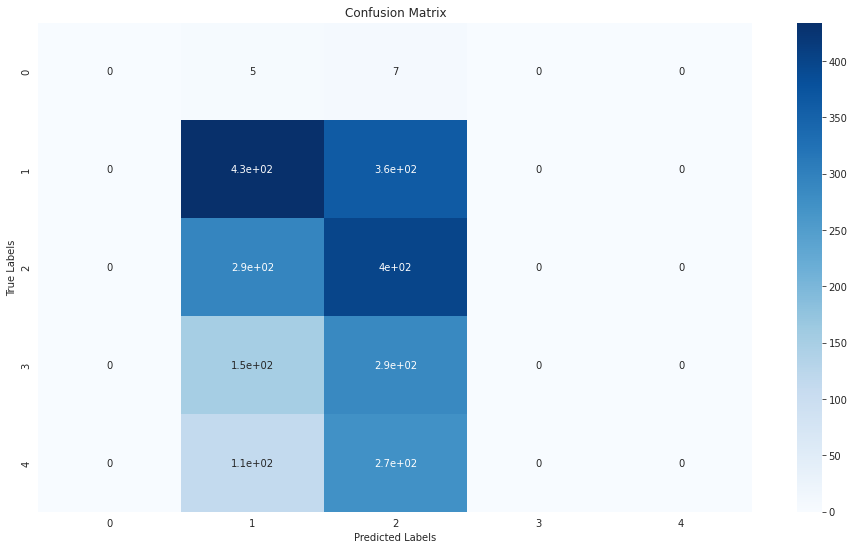

In [40]:
# classifier with k = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)
# classifier with k = 41

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [41]:
q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]
for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.995
Recall for class 'Refused': 0.000
Accuracy for class 'Would definitely get the vaccine': 0.602
Recall for class 'Would definitely get the vaccine': 0.545
Accuracy for class 'Would probably get the vaccine': 0.475
Recall for class 'Would probably get the vaccine': 0.578
Accuracy for class 'Would probably not get the vaccine': 0.811
Recall for class 'Would probably not get the vaccine': 0.000
Accuracy for class 'Would definitely not get the vaccine': 0.835
Recall for class 'Would definitely not get the vaccine': 0.000


## A trend between both models, in terms of predicting attitude toward the COVID Vaccine, is that the model performs much better for predicting those who would definitely/probably get the vaccine compared to those who would probably/definitely NOT get the vaccine.

# SMOTE Technique used for above model

In [42]:
# define X and y
X = X.values
y = Y.values.ravel()

# instantiate SMOTE
sm = SMOTE(random_state=123)

# resample the data
X_res, y_res = sm.fit_resample(X, y)

# check the class distribution
unique, counts = np.unique(y_res, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 2578, 1: 2578, 2: 2578, 3: 2578, 4: 2578}


Highest accuracy k: 60


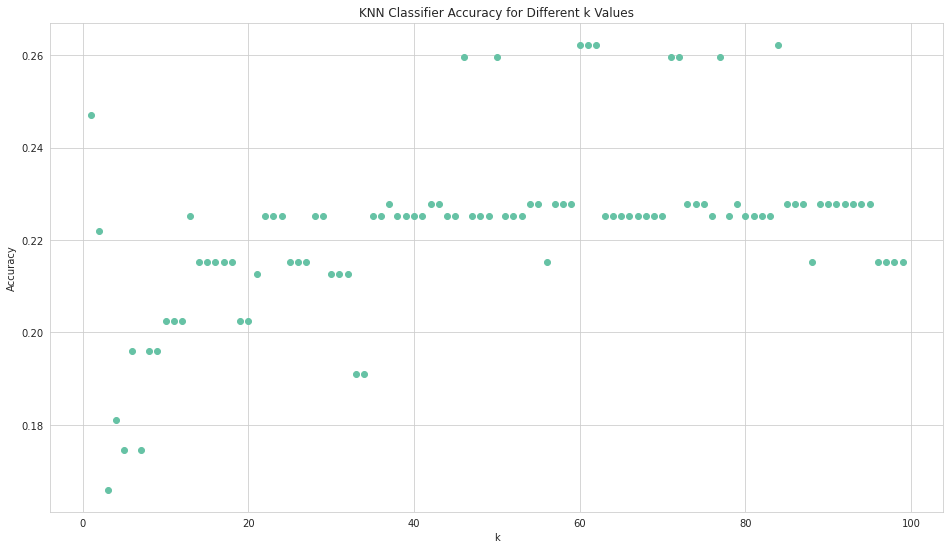

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.ravel())
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

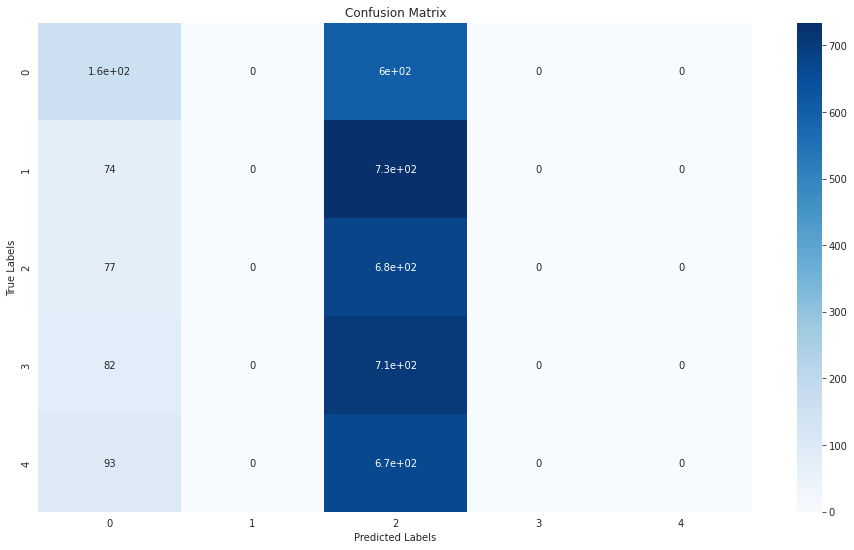

In [44]:
# classifier with k = 60
knn = KNeighborsClassifier(n_neighbors=97)
knn.fit(X_train, Y_train.ravel())
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)
# classifier with k = 41

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [45]:
q102_labels = ["Refused", 
               "Very Important", 
               "Somewhat Important", 
               "Not Too Important", 
               "Not At All Important"]

for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.760
Recall for class 'Refused': 0.207
Accuracy for class 'Very Important': 0.791
Recall for class 'Very Important': 0.000
Accuracy for class 'Somewhat Important': 0.280
Recall for class 'Somewhat Important': 0.898
Accuracy for class 'Not Too Important': 0.796
Recall for class 'Not Too Important': 0.000
Accuracy for class 'Not At All Important': 0.804
Recall for class 'Not At All Important': 0.000


## Result is much higher recall scores, overall an improved model.

# Modeling "Education" and "Income" to the population who would probably/definitely not get a coronavirus vaccine. Specifically, their response to "You want to know more about how well the vaccine works"

Highest accuracy k: 2


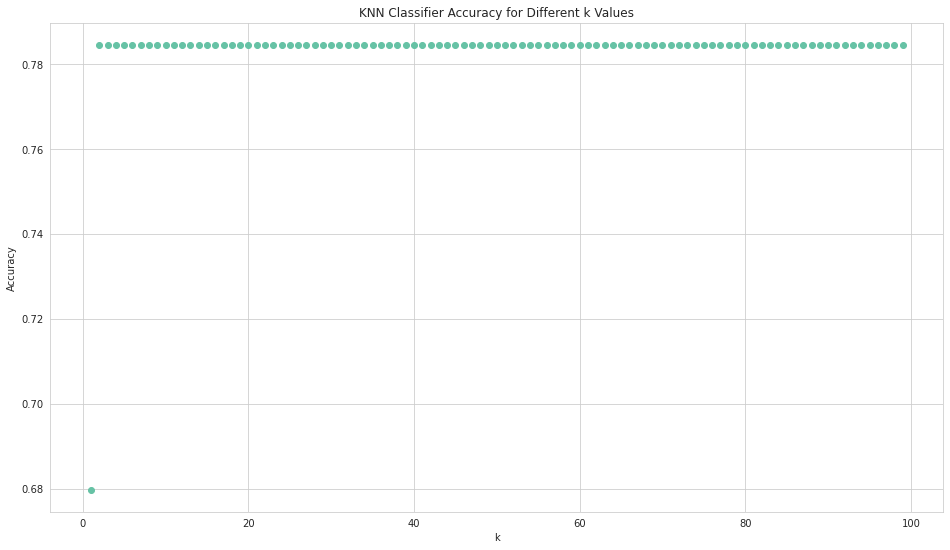

In [46]:
# create a new dataframe with only the desired columns
new_X = df[['PPINCIMP', 'Q102']]

# filter the dataframe to include only rows where Q102 is 3 or 4
new_X = new_X[(new_X['Q102'] == 3) | (new_X['Q102'] == 4)]

# drop the Q102 column as it's no longer needed
new_X = new_X.drop(columns=['Q102'])
new_Y = df[['Q102A_1']]
new_Y = df[df['Q102A_1'].isin(["-1", "1", "2", "3", "4"])][['Q102A_1']]

X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.values.ravel())
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

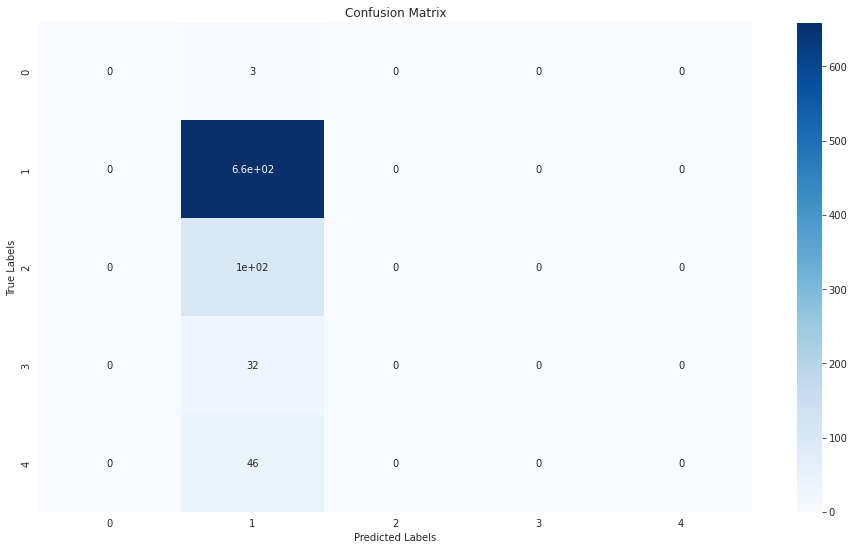

In [47]:
# classifier with k = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train.values.ravel())
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)
# classifier with k = 41

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [48]:
q102_labels = ["Refused", 
               "Very Important", 
               "Somewhat Important", 
               "Not Too Important", 
               "Not At All Important"]

for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.996
Recall for class 'Refused': 0.000
Accuracy for class 'Very Important': 0.785
Recall for class 'Very Important': 1.000
Accuracy for class 'Somewhat Important': 0.881
Recall for class 'Somewhat Important': 0.000
Accuracy for class 'Not Too Important': 0.962
Recall for class 'Not Too Important': 0.000
Accuracy for class 'Not At All Important': 0.945
Recall for class 'Not At All Important': 0.000


## Dominant prediction of Very Important, shows that majority class is overwhelming. The data needs to be balanced.

# SMOTE Technique used on responses to Q102A_1, : "How important are each of the following reasons for why you would [probably/definitely] NOT get a coronavirus vaccine? You are concerned about the side effects". This is to balance the majority class of 'Very Important', or value 2

In [49]:
# define X and y
X = new_X.values
y = new_Y.values.ravel()

# instantiate SMOTE
sm = SMOTE(random_state=123, k_neighbors=3)

# resample the data
X_res, y_res = sm.fit_resample(X, y)

# check the class distribution
unique, counts = np.unique(y_res, return_counts=True)
print(dict(zip(unique, counts)))

{'-1': 2165, '1': 2165, '2': 2165, '3': 2165, '4': 2165}


Highest accuracy k: 87


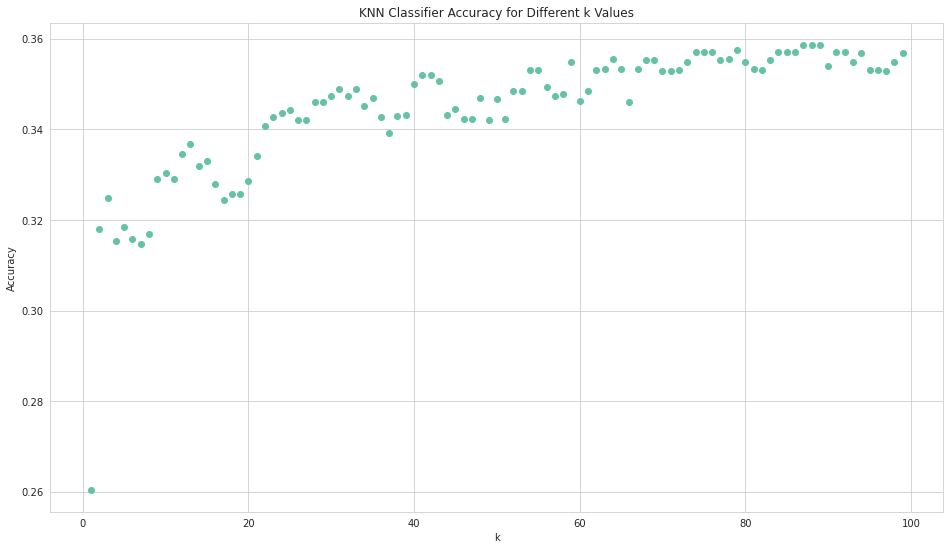

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.ravel())
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

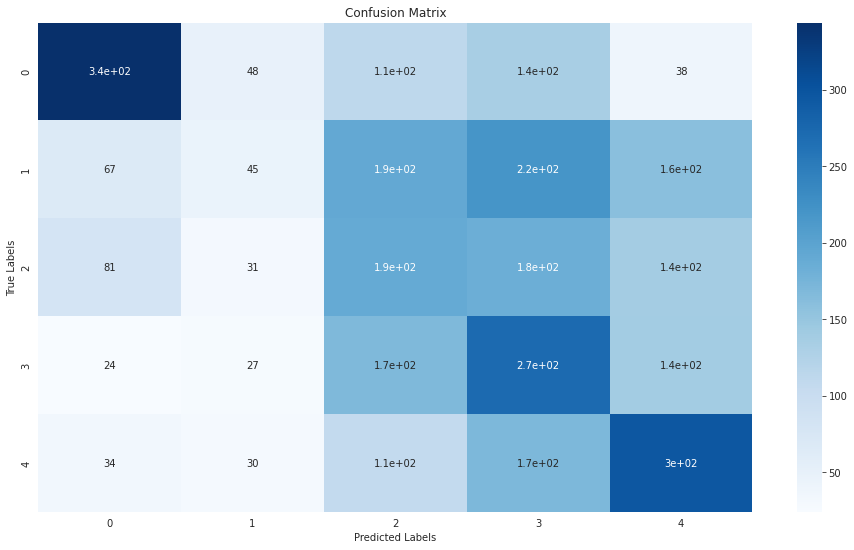

In [51]:
# classifier with k = 97
knn = KNeighborsClassifier(n_neighbors=97)
knn.fit(X_train, Y_train.ravel())
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)
# classifier with k = 41

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [52]:
q102_labels = ["Refused", 
               "Very Important", 
               "Somewhat Important", 
               "Not Too Important", 
               "Not At All Important"]

for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.834
Recall for class 'Refused': 0.508
Accuracy for class 'Very Important': 0.762
Recall for class 'Very Important': 0.066
Accuracy for class 'Somewhat Important': 0.688
Recall for class 'Somewhat Important': 0.304
Accuracy for class 'Not Too Important': 0.672
Recall for class 'Not Too Important': 0.432
Accuracy for class 'Not At All Important': 0.749
Recall for class 'Not At All Important': 0.465


# Modeling Education and Income to Q102A_3: "How important are each of the following reasons for why you would [probably/definitely] NOT get a coronavirus vaccine? You do not think you need the vaccine"

## K-nearest neighbors

Highest accuracy k: 64


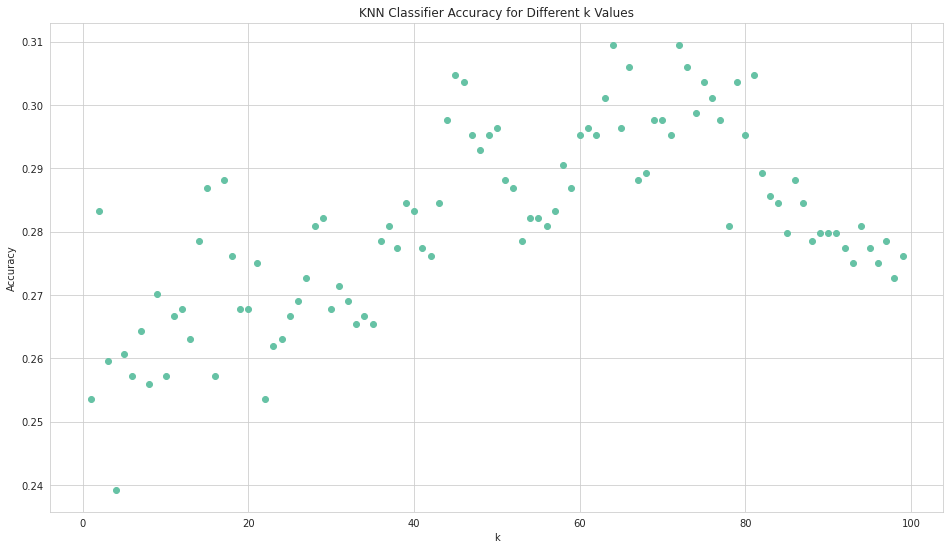

In [53]:
# create a new dataframe with only the desired columns
new_X = df[['PPEDUCAT', 'PPINCIMP', 'Q102']]

# filter the dataframe to include only rows where Q102 is 3 or 4
new_X = new_X[(new_X['Q102'] == 3) | (new_X['Q102'] == 4)]

# drop the Q102 column as it's no longer needed
new_X = new_X.drop(columns=['Q102'])
new_Y = df[['Q102A_3']]
new_Y = df[df['Q102A_3'].isin(["-1", "1", "2", "3", "4"])][['Q102A_3']]

X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.values.ravel())
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

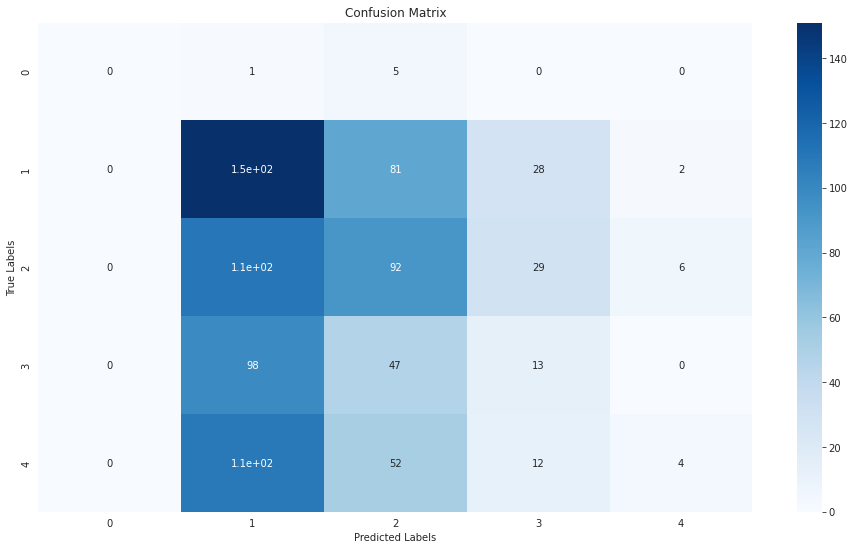

In [54]:
# classifier with k = 64
knn = KNeighborsClassifier(n_neighbors=64)
knn.fit(X_train, Y_train.values.ravel())
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)
# classifier with k = 41

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [55]:
q102C_labels = ["Refused", 
               "Very Important", 
               "Somewhat Important", 
               "Not Too Important", 
               "Not At All Important"]

for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")

Accuracy for class 'Refused': 0.993
Recall for class 'Refused': 0.000
Accuracy for class 'Very Important': 0.489
Recall for class 'Very Important': 0.576
Accuracy for class 'Somewhat Important': 0.607
Recall for class 'Somewhat Important': 0.388
Accuracy for class 'Not Too Important': 0.745
Recall for class 'Not Too Important': 0.082
Accuracy for class 'Not At All Important': 0.785
Recall for class 'Not At All Important': 0.023


# Visualizing State of Residence vs Perception of Covid Vaccine

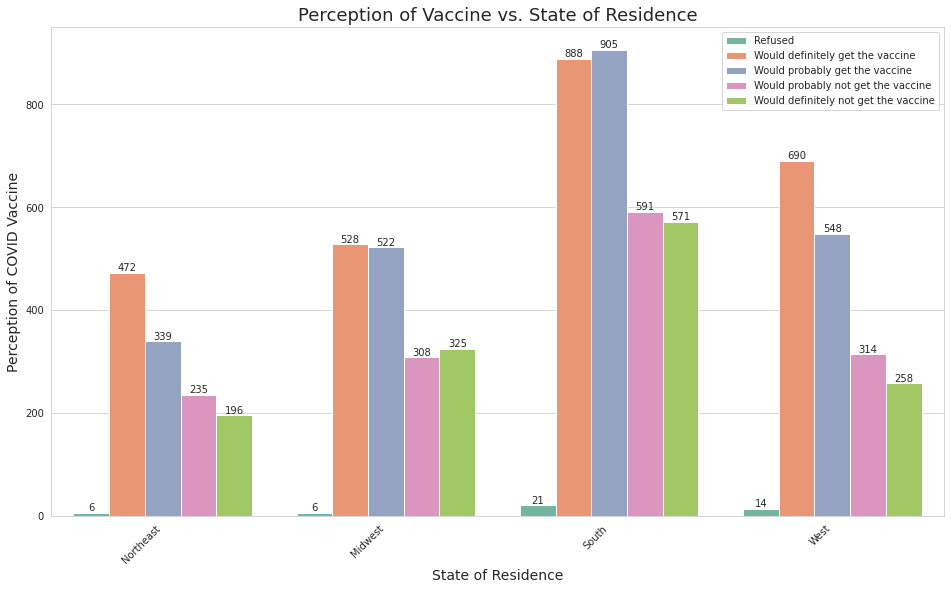

In [56]:
fig = plt.figure(figsize=(16, 9))

# Set the plot style
sns.set_style('whitegrid')

# Create bar plot
ax = sns.countplot(x='PPREG4', hue='Q102', data=df)

original_labels = ['1', '2', '3', '4']

ppreg4_labels = ["Northeast", "Midwest", "South", "West"]

plt.xticks(range(len(original_labels)), ppreg4_labels)

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height())}', 
            ha='center', va='bottom')

plt.title('Perception of Vaccine vs. State of Residence', fontsize=18)
plt.xlabel('State of Residence', fontsize=14)
plt.ylabel('Perception of COVID Vaccine', fontsize=14)

# Show the plot
plt.show()

# Clustering technique to compare levels of emotions of responders: Q30_1 to Q30_6

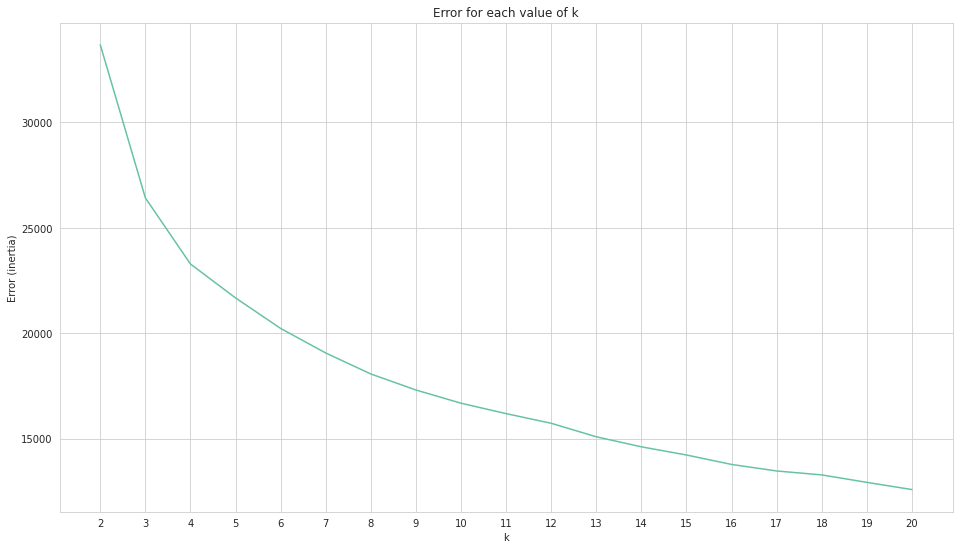

In [57]:
# Q30 - happiness
X = df[['Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6']]

error_values = []
for k in range(2, 21):
    # initialize the KMeans algorithm with k clusters and random state of 789
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
    # fit the KMeans algorithm to the sampled_df dataframe
    kmeans.fit(X)
    # calculate inertia and silhouette
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X, kmeans.labels_, random_state=1)
    # append the inertia value to the error_values list
    error_values.append(inertia)
    # print out values

# range of 2 to 20
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(range(2, 21), error_values)
ax.set_xticks(range(2, 21))
ax.set_xlabel('k')
ax.set_ylabel('Error (inertia)')
ax.set_title('Error for each value of k')
plt.show()

In [58]:
# estimating elbow with kneed package
kneedle = KneeLocator(range(2, 21), error_values, curve='convex', direction='decreasing')
# elbow value
print(f"Suggested elbow value: {kneedle.elbow:.0f}")

Suggested elbow value: 6


In [59]:
# k = 6  is chosen, from elbow score
k = 6
# kmeans with k = 6
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
# fit the KMeans algorithm to the X dataframe
kmeans.fit(X)
# assign cluster labels to the X dataframe
df.loc[:, 'cluster_label_1'] = kmeans.predict(X)

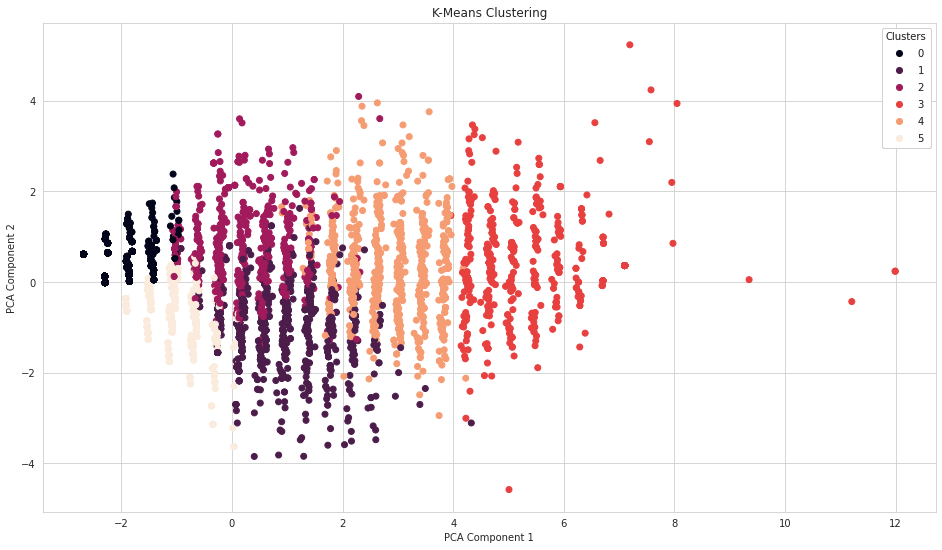

In [60]:
# reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plot the clusters
fig, ax = plt.subplots(figsize=(16, 9)) # set figsize parameter here
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster_label_1'])
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

## Clustering has revealed some distinct clusters from the responses for questions Q30_1 to Q30_6, which revolved around being nervous, hopeless, restless, extremely sad, feeling everything took a great effort, and worthless. While some clusters are overlapping, clusters 3 and 4 are very distinct, and clusters 0 and 5 are fairly distinct, from the eye test.

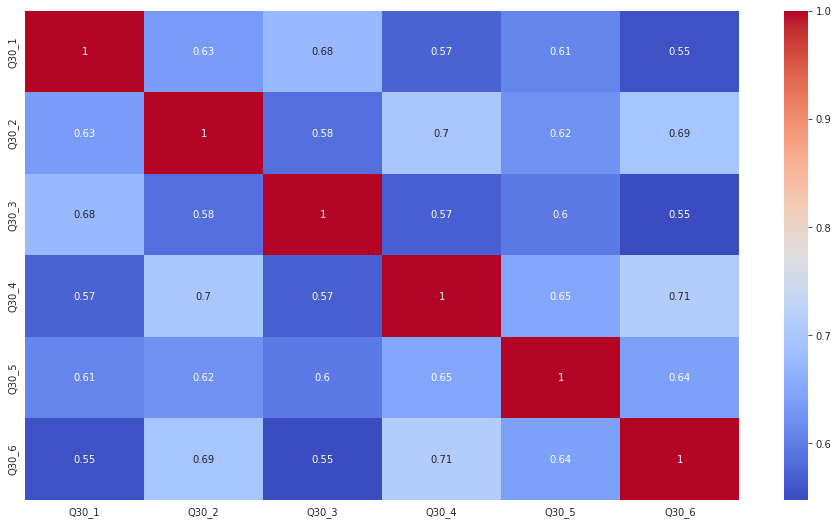

In [61]:

fig, ax = plt.subplots(figsize=(16, 9))
corr_matrix = df[['Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

## There is a moderately strong, positive correlation with all variables with each other. This can be interperted as if as a person answers lower on the scale for how often they felt restless/hopeless etc., their responses for the other questions will also be lower on the scale. This is because the variables are encoded to take a higher value as they move down the scale of the responses (All of the time -> Some of the time -> A little of the time -> None of the Time)

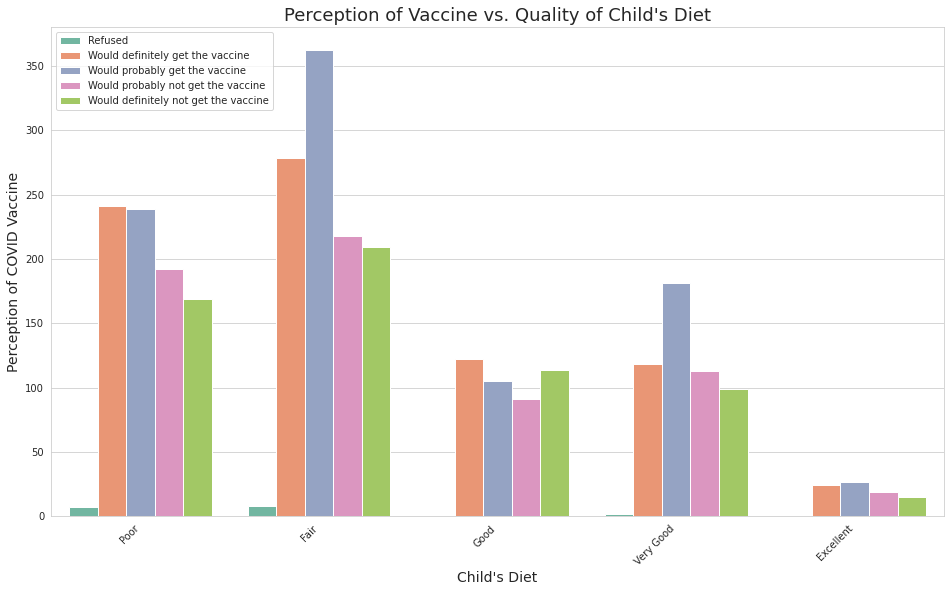

In [62]:
fig = plt.figure(figsize=(16, 9))

df_filtered = df[df['Q24B'].isin(['1', '2', '3', '4', '5'])]

# Set the plot style
sns.set_style('whitegrid')

# Create bar plot
ax = sns.countplot(x='Q24B', hue='Q102', data=df_filtered)

original_labels = ['1', '2', '3', '4', '5']

own_child_labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]

plt.xticks(range(len(original_labels)), own_child_labels)

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')


plt.title("Perception of Vaccine vs. Quality of Child's Diet", fontsize=18)
plt.xlabel("Child's Diet", fontsize=14)
plt.ylabel('Perception of COVID Vaccine', fontsize=14)

# Show the plot
plt.show()

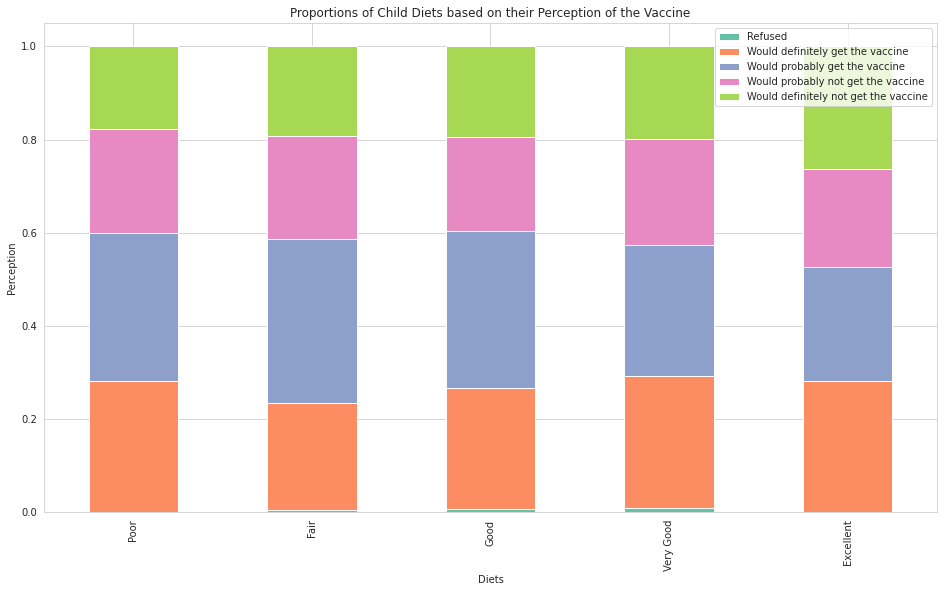

In [63]:
df_filtered = df[df['Q24B'].isin(['1', '2', '3', '4', '5'])]

# Group data by Q29 and calculate proportion of each category within each group
grouped = df_filtered.groupby('Q24B')['Q102'].value_counts(normalize=True).unstack()

sns.set_palette("Set2")
# Create stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(16, 9))

original_labels = ['1', '2', '3', '4', '5']

own_child_labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]

q102_labels = ["Refused", 
               "Would definitely get the vaccine", 
               "Would probably get the vaccine", 
               "Would probably not get the vaccine", 
               "Would definitely not get the vaccine"]

ax.legend(q102_labels)

plt.xticks(range(len(original_labels)), own_child_labels)
# Set the title and axis labels
ax.set_title('Proportions of Child Diets based on their Perception of the Vaccine')
ax.set_xlabel('Diets')
ax.set_ylabel('Perception')

# Show the plot
plt.show()

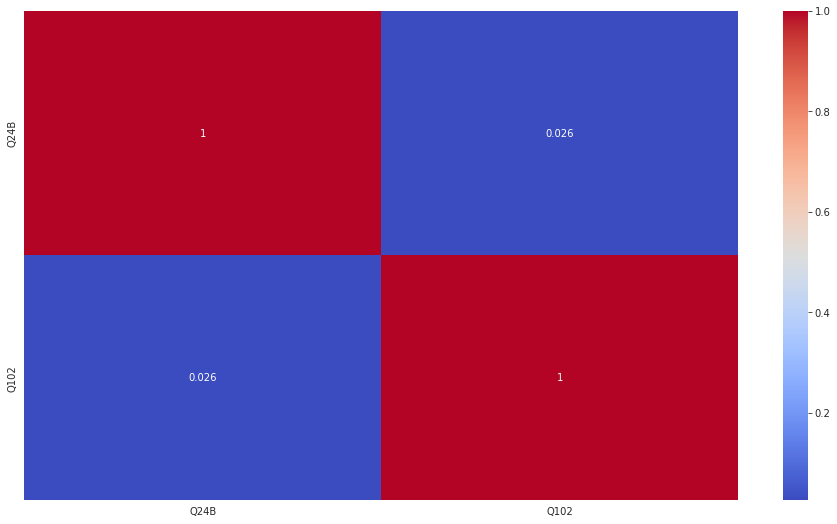

In [64]:
fig, ax = plt.subplots(figsize=(16, 9))
df['Q24B'] = pd.to_numeric(df['Q24B'], errors='coerce')
corr_matrix = df[['Q24B', 'Q102']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
sns.set_palette('Set2')
plt.show()

## Therefore, we have that there is no correlation between the quality of a respondent's child's diet and their perception of the COVID vaccine

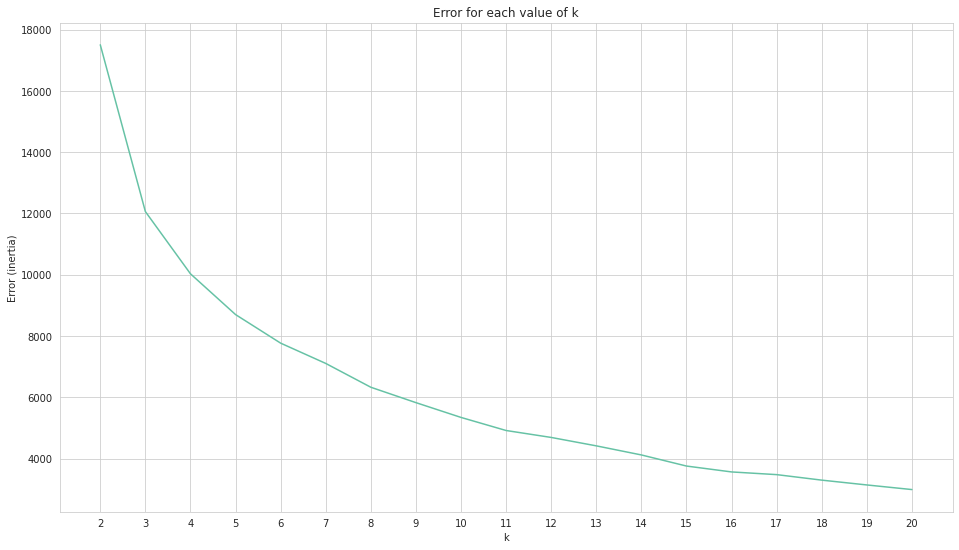

In [65]:
# Q102C_1 through 9 - who would you trust about COVID
# First look : big government - C_2, C_3, C_6

X = df[['Q102C_2', 'Q102C_3', 'Q102C_6']]

error_values = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters = k, n_init=10, random_state = 1)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X, kmeans.labels_, random_state=1)
    # append the inertia value to the error_values list
    error_values.append(inertia)
    # print out values

# range of 2 to 20
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(range(2, 21), error_values)
ax.set_xticks(range(2, 21))
ax.set_xlabel('k')
ax.set_ylabel('Error (inertia)')
ax.set_title('Error for each value of k')
plt.show()

In [66]:
# k = 3  is chosen, with three variables
k = 3
# kmeans with k = 3
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
# fit the KMeans algorithm to the X dataframe
kmeans.fit(X)
# assign cluster labels to the X dataframe
df.loc[:, 'cluster_label_2'] = kmeans.predict(X)

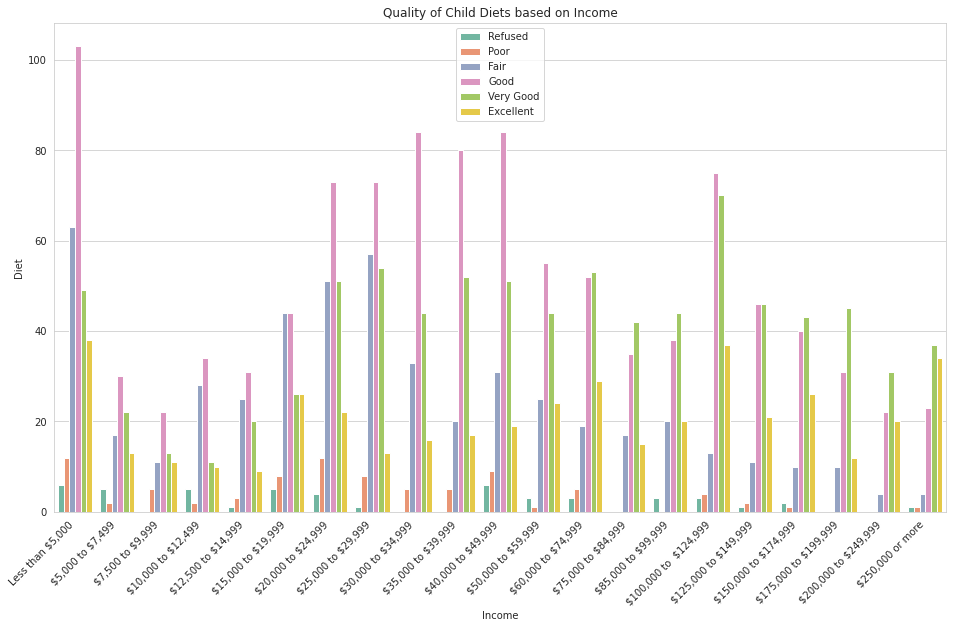

In [67]:


fig = plt.figure(figsize=(16, 9))


# Group data by Q24B and calculate proportion of each category within each group
grouped = df.groupby('Q24B')['PPINCIMP'].value_counts(normalize=True).unstack()



# Create stacked bar chart

ax = sns.countplot(x="PPINCIMP", hue="Q24B", data=df, palette='Set2')


original_labels = range(1,22)


pi_labels = ["Less than \$5,000", "\$5,000 to \$7,499", "\$7,500 to \$9,999", "\$10,000 to \$12,499", "\$12,500 to \$14,999", "\$15,000 to \$19,999", "\$20,000 to \$24,999", "\$25,000 to \$29,999", "\$30,000 to \$34,999", 
             "\$35,000 to \$39,999", "\$40,000 to \$49,999", "\$50,000 to \$59,999", "\$60,000 to \$74,999", "\$75,000 to \$84,999", "\$85,000 to \$99,999", "\$100,000 to  \$124,999", "\$125,000 to \$149,999", "\$150,000 to \$174,999", "\$175,000 to \$199,999", "\$200,000 to \$249,999", "\$250,000 or more"]

diet_labels = ["Refused", "Poor", "Fair", "Good", "Very Good", "Excellent"]



ax.legend(diet_labels)

plt.xticks(range(len(original_labels)), pi_labels)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')
# Set the title and axis labels
ax.set_title('Quality of Child Diets based on Income')
ax.set_xlabel('Income')
ax.set_ylabel('Diet')

# Show the plot
plt.show()

## Based on this visualization, it seems that as household income increases, the proportion of parents who say that their child's diet is fair or poor decreases. Furthermore, the proportion of parents who stated that their child's diet way very good or excellent increased as household income went up

In [68]:
X = df[['PPINCIMP']].sample(n=3002, random_state=123)
Y = Y[Y.isin([-1, 1, 2, 3, 4, 5])]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

ValueError: ValueError: Found input variables with inconsistent numbers of samples: [3002, 7737]

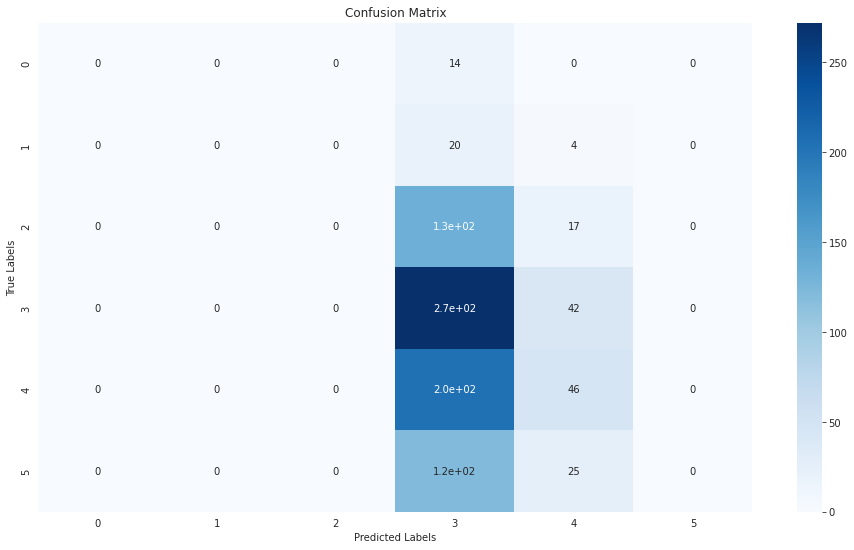

In [113]:
# classifier with highest accuracy k
knn = KNeighborsClassifier(n_neighbors=highest_accuracy_k)
knn.fit(X_train, Y_train)
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [114]:
# define X and y
X = X.values
y = Y.values.ravel()

# instantiate SMOTE
sm = SMOTE(random_state=123)

# resample the data
X_res, y_res = sm.fit_resample(X, y)

# check the class distribution
unique, counts = np.unique(y_res, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 1075, 1.0: 1075, 2.0: 1075, 3.0: 1075, 4.0: 1075, 5.0: 1075}


Highest accuracy k: 82


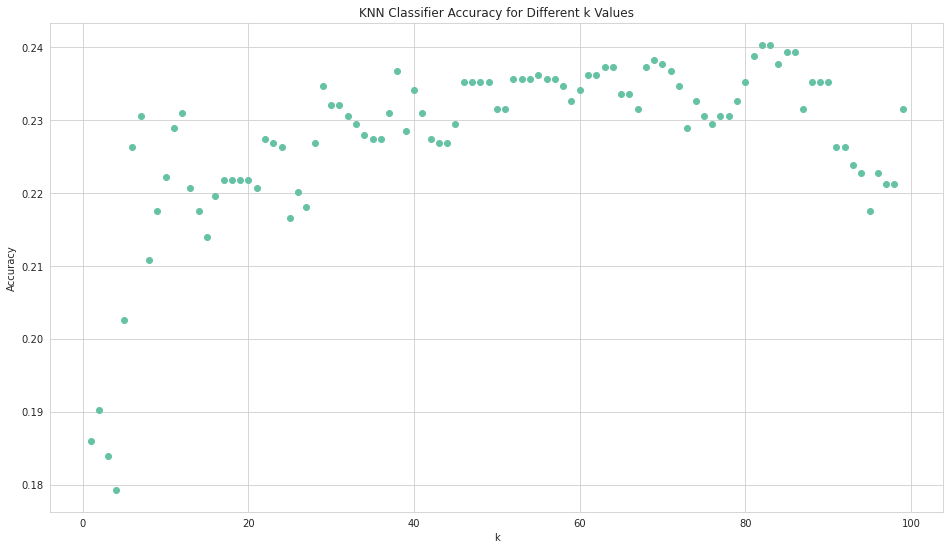

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=456)

accuracy_array = np.array([])
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.ravel())
    KNeighborsClassifier()
    y_pred = knn.predict(X_test)
    # store accuracy
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    accuracy_array = np.append(accuracy_array, accuracy)

# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
highest_accuracy_k = np.argmax(accuracy_array) + 1
print(f"Highest accuracy k: {highest_accuracy_k}")

# create an array of k values
k_values = np.arange(1, 100)
# plot the accuracy against k
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(k_values, accuracy_array)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Classifier Accuracy for Different k Values')
plt.show()

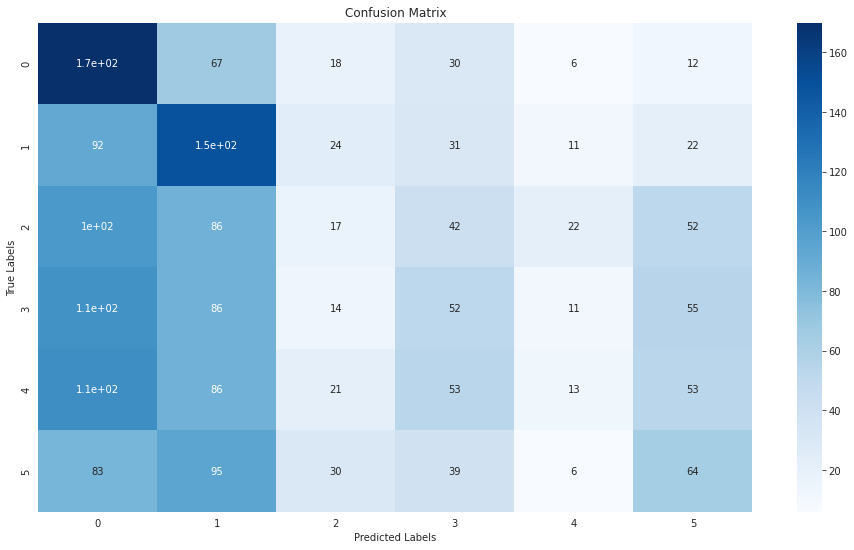

In [117]:
# classifier with k = highest
knn = KNeighborsClassifier(n_neighbors=highest_accuracy_k)
knn.fit(X_train, Y_train.ravel())
# Make predictions for the out-of-sample test data
Y_pred = knn.predict(X_test)

conf_mat = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(16, 9))

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show plot
plt.show()

In [118]:
diet_labels = ["Refused", "Poor", "Fair", "Good", "Very Good", "Excellent"]

for i in range(5):
    tp = conf_mat[i, i]
    tn = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + tp
    fp = np.sum(conf_mat[:, i]) - tp
    fn = np.sum(conf_mat[i, :]) - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    print(f"Accuracy for class '{q102_labels[i]}': {accuracy:.3f}")
    print(f"Recall for class '{q102_labels[i]}': {recall:.3f}")


Accuracy for class 'Refused': 0.674
Recall for class 'Refused': 0.561
Accuracy for class 'Would definitely get the vaccine': 0.690
Recall for class 'Would definitely get the vaccine': 0.453
Accuracy for class 'Would probably get the vaccine': 0.787
Recall for class 'Would probably get the vaccine': 0.053
Accuracy for class 'Would probably not get the vaccine': 0.758
Recall for class 'Would probably not get the vaccine': 0.160
Accuracy for class 'Would definitely not get the vaccine': 0.804
Recall for class 'Would definitely not get the vaccine': 0.039
